In [1]:
import numpy as np
import sys
sys.path.append("../model")
import matplotlib.pyplot as plt
import torch
from torch import tensor
from torch import nn
import seaborn as sns
from torch.autograd.functional import jacobian

Here I'd like to test the convergence of Hebbian learning under (1) same freq different phase and (2) different freq different phase. The logic is that, minimally, the hebbian learning should be *stable* when the output is target and the activation is initial.

### Fixed Freq

In [2]:
# generate targets
time_points = np.arange(5000)
half_period = 20
targets = ((np.sin((time_points + 10)/half_period*np.pi))/4 + 0.5)

In [3]:
# generate sine waves
numnodes = 100
half_period = 20
phases = []
means = []
amplitudes = []

for i in range(numnodes):
    phase = np.random.randint(0, 2 * half_period)
    mean = np.random.uniform(0.2, 0.8)
    amplitude = np.random.uniform(0.1, 0.5)
    phases.append(phase)
    means.append(mean)
    amplitudes.append(amplitude)

activations = []
for i in range(numnodes):
    activations.append((np.sin((time_points + phases[i])/half_period*np.pi) * amplitudes[i]) + means[i])
activations = np.stack(activations, axis=0)

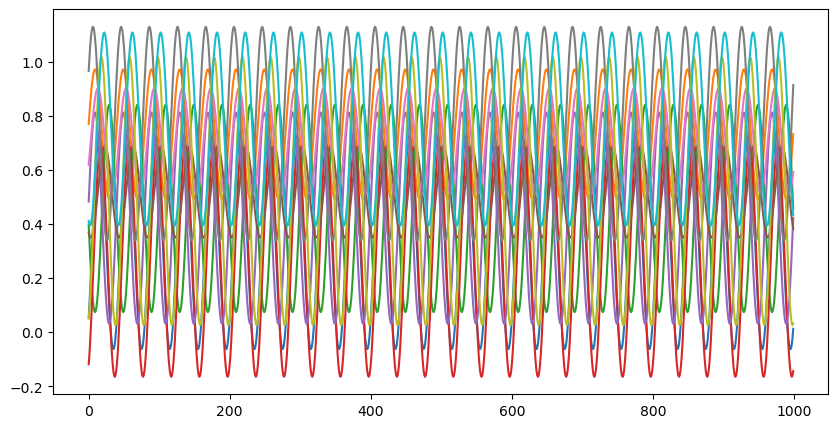

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(0, 10):
    plt.plot(activations[i,0:1000], label=f"Node {i}")

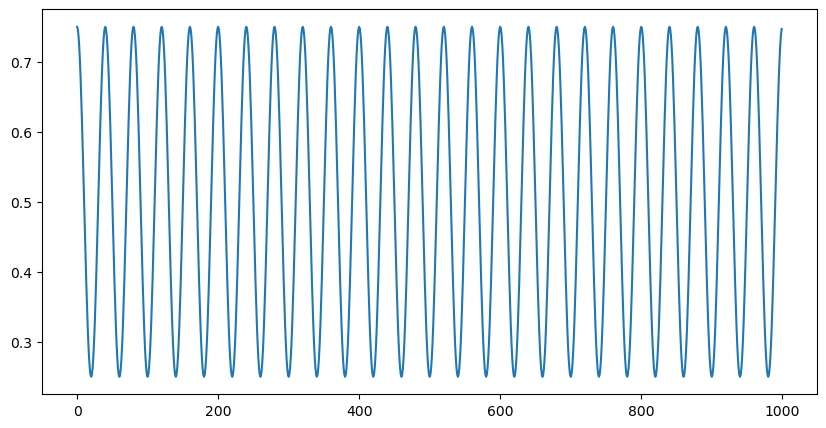

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(targets[0:1000], label="Target")

In [6]:
# generate init weights
init_weights = np.random.uniform(0, 1, numnodes)
weights = init_weights.copy()

Text(0, 0.5, 'Initial Weight')

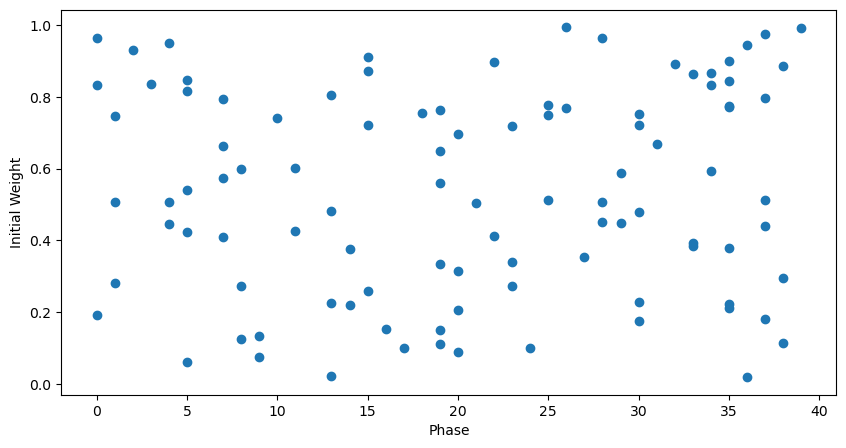

In [7]:
# plot initial weights against phases
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(phases, init_weights)
plt.xlabel("Phase")
plt.ylabel("Initial Weight")

In [8]:
# run hebbian learning
hebbian_lr = 0.01
neg_punishment = 19
target_mean = 0.5
weight_sum = 0.5 * numnodes
means_np = np.array(means)
amplitudes_np = np.array(amplitudes)
for i in time_points:
    this_activation = activations[:,i]
    this_target = targets[i]
    # Calculate Hebbian weight updates
    # hebbian_update = np.sign((this_target - target_mean) * ((this_activation - means_np)/amplitudes_np))
    hebbian_update = (this_target - target_mean) * ((this_activation - means_np)/amplitudes_np)
    hebbian_update[hebbian_update < 0] *= neg_punishment
    # Normalized Hebbian learning
    tmp_output_weight_matrix = weights + hebbian_lr * hebbian_update
    tmp_output_weight_matrix[tmp_output_weight_matrix < 0] = 0
    tmp_output_weight_matrix /= np.sum(np.abs(tmp_output_weight_matrix)) / weight_sum
    # update init weights
    weights = tmp_output_weight_matrix.copy()

Text(0, 0.5, 'Weight')

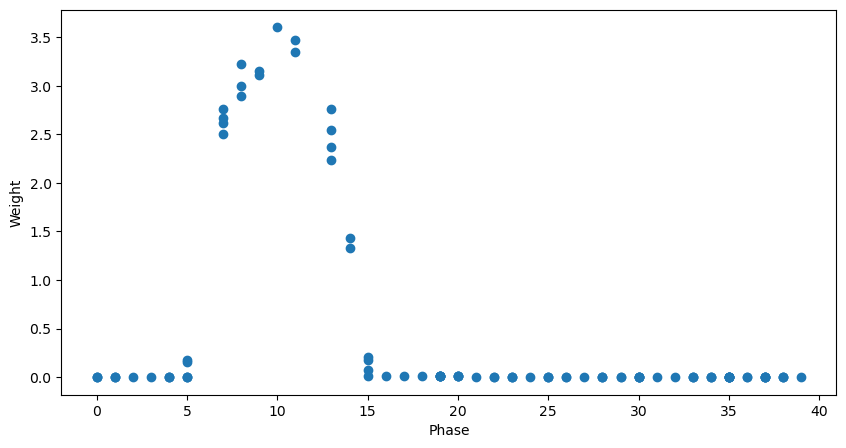

In [9]:
# plot initial weights against phases
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(phases, weights)
plt.xlabel("Phase")
plt.ylabel("Weight")

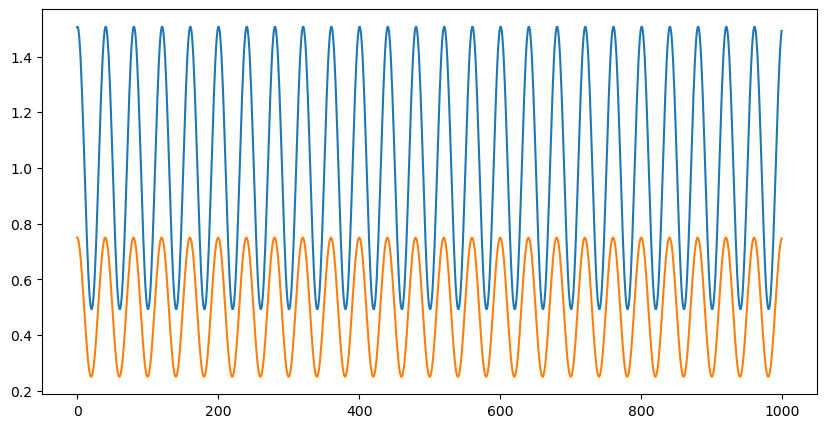

In [10]:
# sum all activations by weights
output = np.dot(weights, activations)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(output[0:1000]/np.mean(output), label="Output")
plt.plot(targets[0:1000], label="Target")

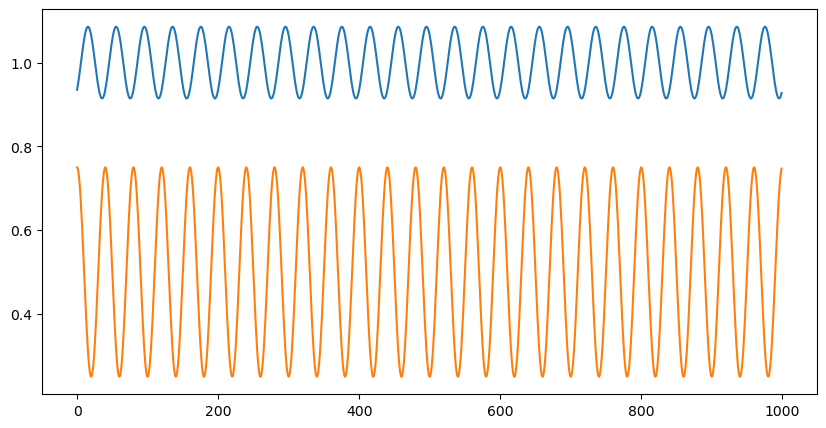

In [11]:
init_output = np.dot(init_weights, activations)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(init_output[0:1000]/np.mean(init_output), label="Output")
plt.plot(targets[0:1000], label="Target")

### Random Freq

In [12]:
# generate targets
time_points = np.arange(10000)
half_period = 20
targets = ((np.sin((time_points + 10)/half_period*np.pi))/4 + 0.5)

In [13]:
# generate sine waves
np.random.seed(0)
numnodes = 1000
half_periods = []
phases = []
means = []
amplitudes = []

for i in range(numnodes):
    # half_period = np.random.choice([10, 20, 30])
    half_period = np.random.randint(10, 30)
    phase = np.random.randint(0, 2 * half_period)
    mean = np.random.uniform(0.2, 0.8)
    amplitude = np.random.uniform(0.1, 0.5)
    half_periods.append(half_period)
    phases.append(phase)
    means.append(mean)
    amplitudes.append(amplitude)

activations = []
for i in range(numnodes):
    activations.append((np.sin((time_points + phases[i])/half_periods[i]*np.pi) * amplitudes[i]) + means[i])
activations = np.stack(activations, axis=0)

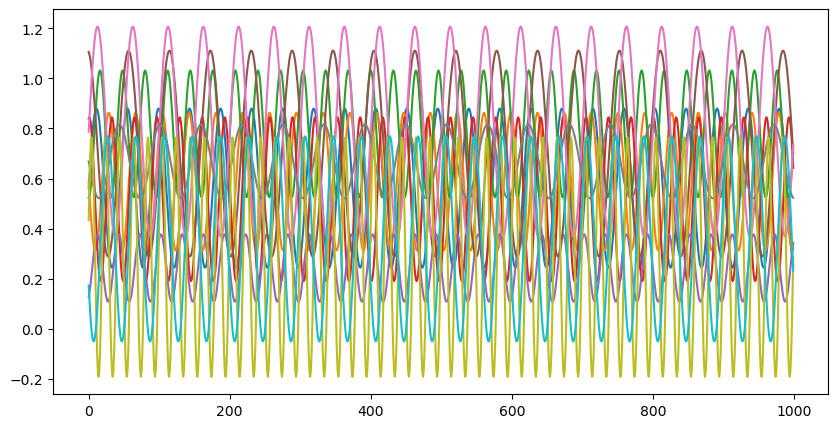

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(0, 10):
    plt.plot(activations[i,0:1000], label=f"Node {i}")

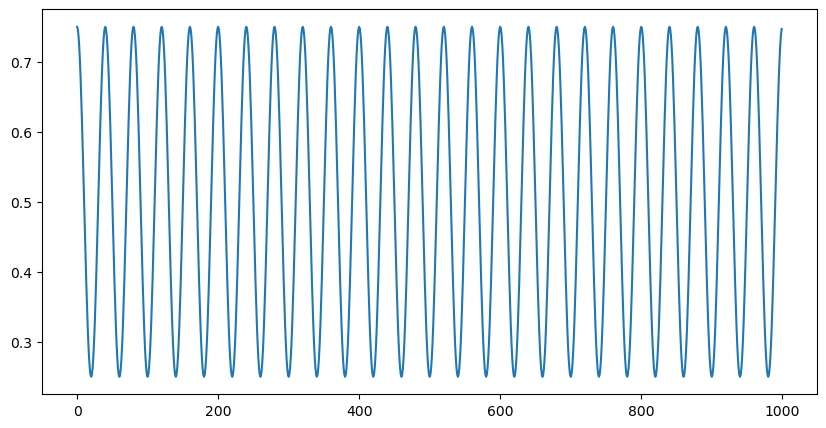

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(targets[0:1000], label="Target")

In [16]:
# generate init weights
init_weights = np.random.uniform(0, 1, numnodes)
weights = init_weights.copy()

Text(0, 0.5, 'Initial Weight')

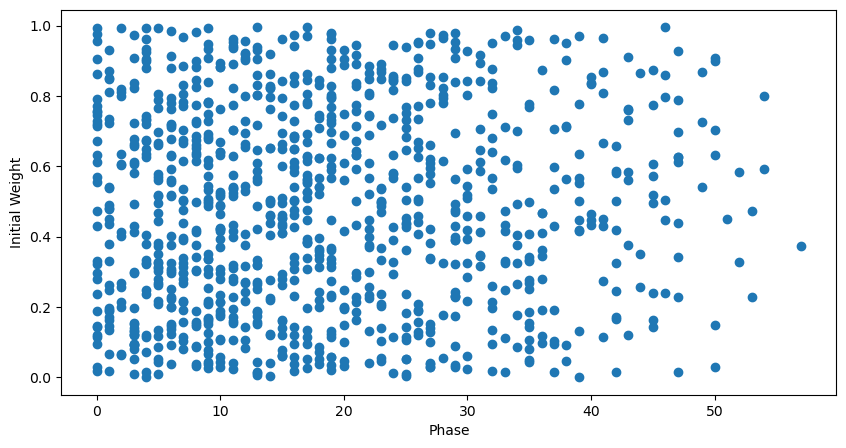

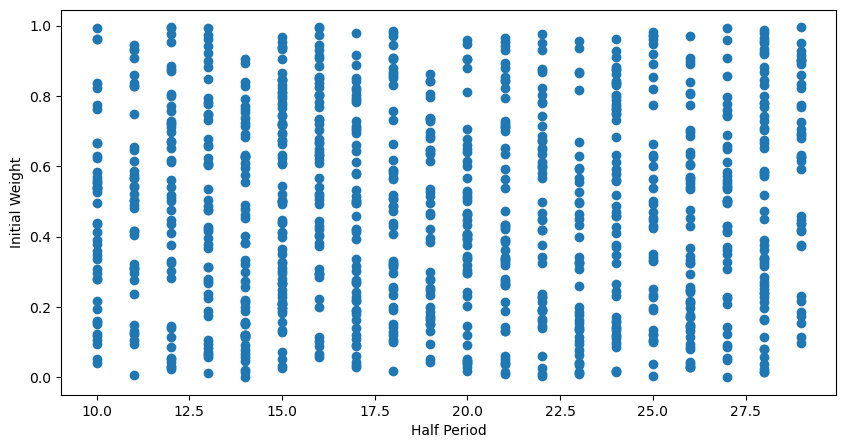

In [17]:
# plot initial weights against phases and half periods
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(phases, init_weights)
plt.xlabel("Phase")
plt.ylabel("Initial Weight")

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(half_periods, init_weights)
plt.xlabel("Half Period")
plt.ylabel("Initial Weight")

In [18]:
# run hebbian learning
hebbian_lr = 0.01
neg_punishment = 19
target_mean = 0.5
weight_sum = 0.5 * numnodes
means_np = np.array(means)
amplitudes_np = np.array(amplitudes)
for i in time_points:
    this_activation = activations[:,i]
    this_target = targets[i]
    # Calculate Hebbian weight updates
    # hebbian_update = np.sign((this_target - target_mean) * ((this_activation - means_np)/amplitudes_np))
    hebbian_update = (this_target - target_mean) * ((this_activation - means_np)/amplitudes_np)
    hebbian_update[hebbian_update < 0] *= neg_punishment
    # Normalized Hebbian learning
    tmp_output_weight_matrix = weights + hebbian_lr * hebbian_update
    tmp_output_weight_matrix[tmp_output_weight_matrix < 0] = 0
    tmp_output_weight_matrix /= np.sum(np.abs(tmp_output_weight_matrix)) / weight_sum
    # update init weights
    weights = tmp_output_weight_matrix.copy()

Text(0, 0.5, 'Weight')

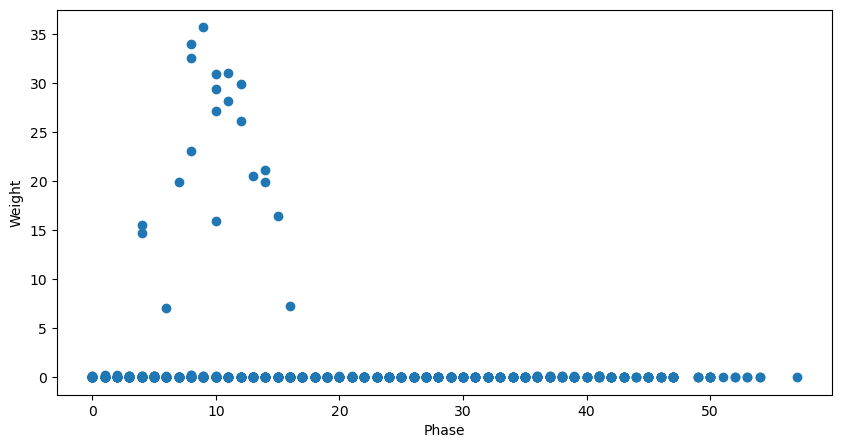

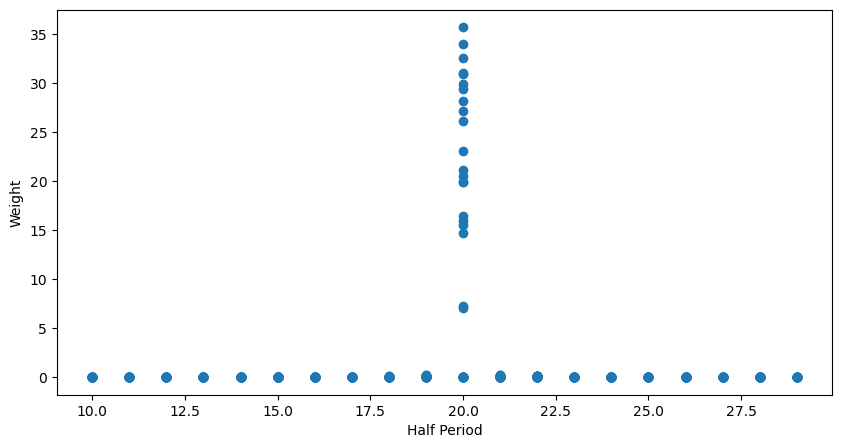

In [19]:
# plot weights against phases
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(phases, weights)
plt.xlabel("Phase")
plt.ylabel("Weight")

# plot weights against half periods
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(half_periods, weights)
plt.xlabel("Half Period")
plt.ylabel("Weight")

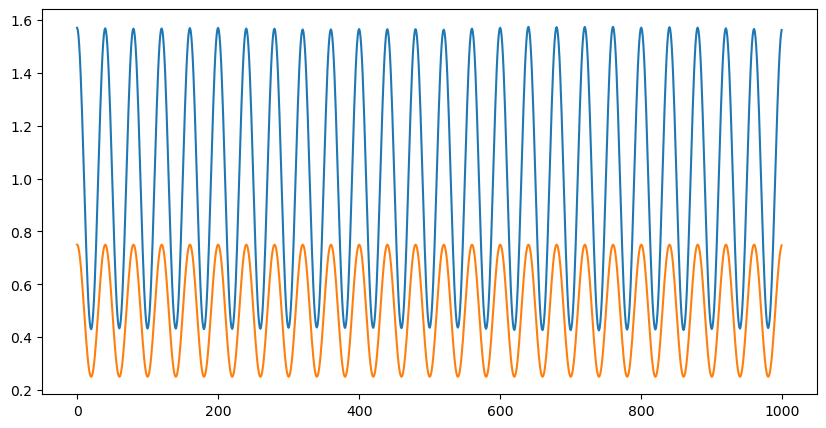

In [20]:
# sum all activations by weights
output = np.dot(weights, activations)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(output[0:1000]/np.mean(output), label="Output")
plt.plot(targets[0:1000], label="Target")

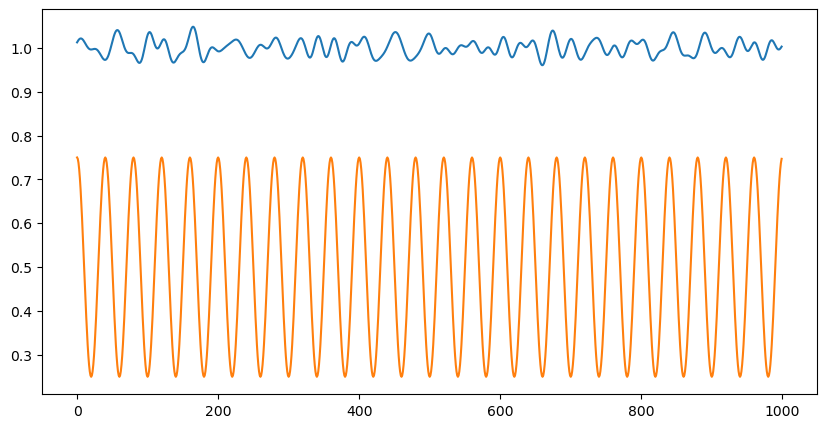

In [21]:
init_output = np.dot(init_weights, activations)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(init_output[0:1000]/np.mean(init_output), label="Output")
plt.plot(targets[0:1000], label="Target")